<a href="https://colab.research.google.com/github/rishabhvenkat/LZC-Plots-for-VS-allepochs/blob/main/LZC_plots_VS_allepochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 41.8 MB/s eta 0:00:00


In [2]:
import mne

In [3]:
import os

# List files in the current directory
print(os.listdir())

['.config', 'VegetativeState_44.set', 'VegetativeState_27.fdt', 'VegetativeState_07.set', 'VegetativeState_27.set', 'VegetativeState_44.fdt', 'sample_data']


In [4]:
!pip install pymatreader

File /content/VegetativeState_06.set found. Proceeding with loading.
Reading /content/VegetativeState_06.fdt
Reading 0 ... 22264319  =      0.000 ... 86969.996 secs...
Error loading file /content/VegetativeState_06.set: Incorrect number of samples (21923776 != 25000000), please report this error to MNE-Python developers
File /content/VegetativeState_07.set found. Proceeding with loading.
Reading /content/VegetativeState_07.fdt
Reading 0 ... 22064639  =      0.000 ... 86189.996 secs...
Error loading file /content/VegetativeState_07.set: Incorrect number of samples (21303168 != 25000000), please report this error to MNE-Python developers
File /content/VegetativeState_27.set found. Proceeding with loading.
Reading /content/VegetativeState_27.fdt
Reading 0 ... 22133759  =      0.000 ... 86459.996 secs...


<ipython-input-5-8b75a278fb22>:22: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True, verbose=True)


File /content/VegetativeState_27.set loaded successfully.
Writing /content/VegetativeState_27_corrected.fif


<ipython-input-5-8b75a278fb22>:39: RuntimeWarning: This filename (/content/VegetativeState_27_corrected.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(corrected_file_path, overwrite=True)


Closing /content/VegetativeState_27_corrected.fif
[done]
Corrected file saved as: /content/VegetativeState_27_corrected.fif
Using matplotlib as 2D backend.


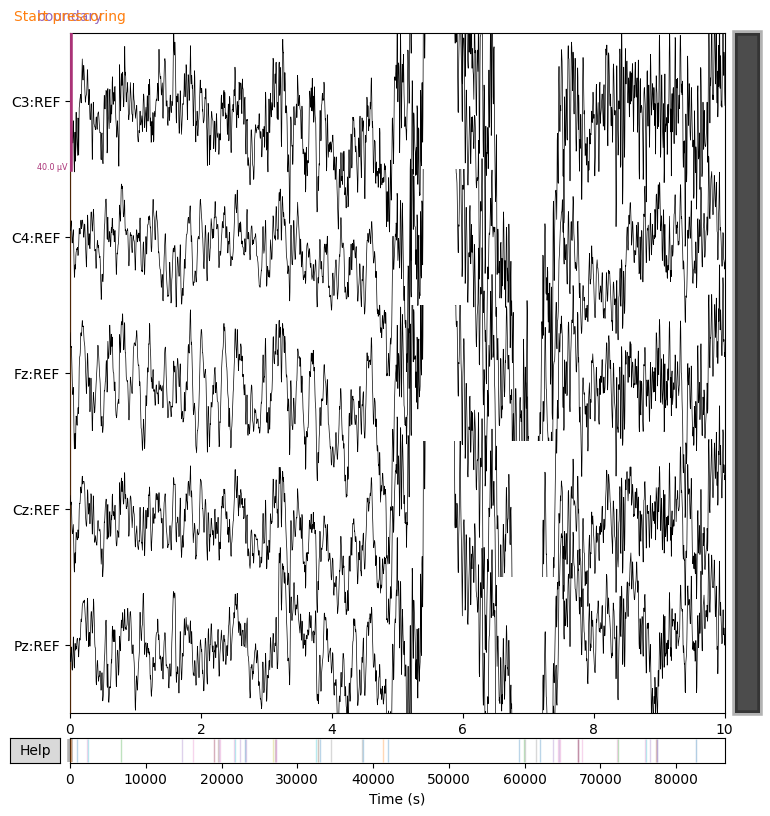

File /content/VegetativeState_44.set found. Proceeding with loading.
Reading /content/VegetativeState_44.fdt
Reading 0 ... 22118399  =      0.000 ... 86399.996 secs...


<ipython-input-5-8b75a278fb22>:22: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True, verbose=True)


File /content/VegetativeState_44.set loaded successfully.
Writing /content/VegetativeState_44_corrected.fif


<ipython-input-5-8b75a278fb22>:39: RuntimeWarning: This filename (/content/VegetativeState_44_corrected.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(corrected_file_path, overwrite=True)


Closing /content/VegetativeState_44_corrected.fif
[done]
Corrected file saved as: /content/VegetativeState_44_corrected.fif


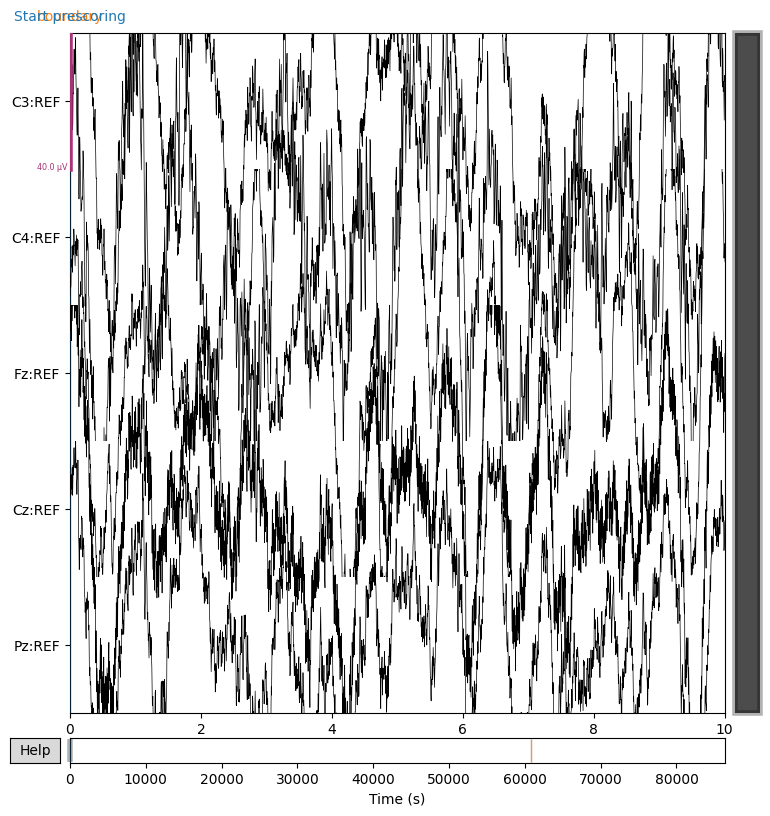

In [5]:
import mne
import numpy as np
import os

# List of file paths for the vegetative state (VS) patients' EEG data (.set files)
vs_file_paths = [
    '/content/VegetativeState_06.set',
    '/content/VegetativeState_07.set',
    '/content/VegetativeState_27.set',
    '/content/VegetativeState_44.set'
]

def check_file_exists(file_path):
    """Check if the file exists."""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"EEG dataset file not found: {file_path}")
    print(f"File {file_path} found. Proceeding with loading.")

def load_data(file_path):
    """Load EEG data from an EEGLAB .set file."""
    try:
        raw = mne.io.read_raw_eeglab(file_path, preload=True, verbose=True)
        print(f"File {file_path} loaded successfully.")
        return raw
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return None

def handle_nan_values(raw):
    """Handle NaN values and bad channels."""
    data = raw.get_data()
    if np.any(np.isnan(data)):
        print("NaN values found in the data. Interpolating bad channels...")
        raw.info['bads'] = ['EEG 001']  # Update with actual bad channels if known
        raw.interpolate_bads()

def save_corrected_data(raw, corrected_file_path):
    """Save the corrected data."""
    raw.save(corrected_file_path, overwrite=True)
    print(f"Corrected file saved as: {corrected_file_path}")

def process_eeglab_files(file_paths):
    """Process all EEGLAB (.set) files."""
    for file_path in file_paths:
        try:
            check_file_exists(file_path)
            raw = load_data(file_path)

            if raw is not None:
                # Handle NaN values and bad channels
                handle_nan_values(raw)

                # Save the corrected data
                corrected_file_path = file_path.replace('.set', '_corrected.fif')
                save_corrected_data(raw, corrected_file_path)

                # Optionally, plot the data to verify its integrity
                raw.plot()

        except Exception as e:
            print(f"An error occurred while processing {file_path}: {e}")

if __name__ == "__main__":
    process_eeglab_files(vs_file_paths)


In [6]:
import mne
import os

# List of file paths for the vegetative state (VS) patients' EEG dataset (.set files)
vs_file_paths = [
    '/content/VegetativeState_27.set',
    '/content/VegetativeState_44.set'
]

try:
    for i, file_path in enumerate(vs_file_paths, start=1):
        # Check if the file exists
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"The file {file_path} does not exist.")

        # Load the .set file (corresponding .fdt should be in the same location)
        raw = mne.io.read_raw_eeglab(file_path, preload=True)
        print(f"Dataset {i} loaded successfully from {file_path}.")

        # Check for annotations (optional step, depending on your needs)
        annotations = raw.annotations
        if annotations:
            print(f"Annotations for dataset {i}: {annotations}")

        # Save the dataset with a new name
        corrected_file_path = f'VS_Patient_{i}_raw.fif'
        raw.save(corrected_file_path, overwrite=True)
        print(f"Dataset {i} saved as '{corrected_file_path}'")

except FileNotFoundError as fnfe:
    print(f"File not found: {fnfe}")
except Exception as e:
    print("An unexpected error occurred.")
    print(e)


Reading /content/VegetativeState_27.fdt
Reading 0 ... 22133759  =      0.000 ... 86459.996 secs...
Dataset 1 loaded successfully from /content/VegetativeState_27.set.
Annotations for dataset 1: <Annotations | 59 segments: Impedance1 (1), Start prescoring (2), birds ...>
Writing /content/VS_Patient_1_raw.fif


<ipython-input-6-1b6766252977>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Closing /content/VS_Patient_1_raw.fif
[done]
Dataset 1 saved as 'VS_Patient_1_raw.fif'
Reading /content/VegetativeState_44.fdt
Reading 0 ... 22118399  =      0.000 ... 86399.996 secs...
Dataset 2 loaded successfully from /content/VegetativeState_44.set.
Annotations for dataset 2: <Annotations | 5 segments: Start prescoring (2), boundary (3)>
Writing /content/VS_Patient_2_raw.fif


<ipython-input-6-1b6766252977>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Closing /content/VS_Patient_2_raw.fif
[done]
Dataset 2 saved as 'VS_Patient_2_raw.fif'


In [7]:
file_paths = [
    '/content/VegetativeState_27_corrected.fif',
    '/content/VegetativeState_44_corrected.fif'
    # Add the correct paths for the other files
]

In [8]:
import mne
import os

# List of file paths for the 2 VS patients' .fif files
vs_file_paths = [
    'VS_Patient_1_raw.fif',
    'VS_Patient_2_raw.fif',
]

try:
    for i, file_path in enumerate(vs_file_paths, start=1):
        # Check if the file exists
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"The file {file_path} does not exist.")

        # Load the .fif file
        raw = mne.io.read_raw_fif(file_path, preload=True)
        print(f"\nDataset {i} loaded successfully from {file_path}.")

        # Print the basic info of the dataset
        print(f"Basic Info for VS Patient {i}:")
        print(raw.info)

except FileNotFoundError as fnfe:
    print(f"File not found: {fnfe}")
except Exception as e:
    print("An unexpected error occurred.")
    print(e)


Opening raw data file VS_Patient_1_raw.fif...
    Range : 0 ... 22133759 =      0.000 ... 86459.996 secs
Ready.
Reading 0 ... 22133759  =      0.000 ... 86459.996 secs...

Dataset 1 loaded successfully from VS_Patient_1_raw.fif.
Basic Info for VS Patient 1:
<Info | 10 non-empty values
 bads: []
 ch_names: C3:REF, C4:REF, Fz:REF, Cz:REF, Pz:REF
 chs: 5 EEG
 custom_ref_applied: False
 dig: 5 items (5 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 5
 projs: []
 sfreq: 256.0 Hz
>
Opening raw data file VS_Patient_2_raw.fif...
    Range : 0 ... 22118399 =      0.000 ... 86399.996 secs
Ready.
Reading 0 ... 22118399  =      0.000 ... 86399.996 secs...

Dataset 2 loaded successfully from VS_Patient_2_raw.fif.
Basic Info for VS Patient 2:
<Info | 10 non-empty values
 bads: []
 ch_names: C3:REF, C4:REF, Fz:REF, Cz:REF, Pz:REF
 chs: 5 EEG
 custom_ref_applied: False
 dig: 5 items (5 EEG)
 file_id: 4 items (dict)
 highpass:

In [9]:
import mne
import os

# List of file paths for the 2 VS patients' .fif files
vs_file_paths = [
    'VS_Patient_1_raw.fif',
    'VS_Patient_2_raw.fif',
]

try:
    for i, file_path in enumerate(vs_file_paths, start=1):
        # Check if the file exists
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"The file {file_path} does not exist.")

        # Load the .fif file
        raw = mne.io.read_raw_fif(file_path, preload=True)
        print(f"\nDataset {i} loaded successfully from {file_path}.")

        # Calculate the total time for the dataset
        total_time = raw.n_times / raw.info['sfreq']
        print(f"Total time for VS Patient {i}: {total_time:.2f} seconds")

except FileNotFoundError as fnfe:
    print(f"File not found: {fnfe}")
except Exception as e:
    print("An unexpected error occurred.")
    print(e)


Opening raw data file VS_Patient_1_raw.fif...
    Range : 0 ... 22133759 =      0.000 ... 86459.996 secs
Ready.
Reading 0 ... 22133759  =      0.000 ... 86459.996 secs...

Dataset 1 loaded successfully from VS_Patient_1_raw.fif.
Total time for VS Patient 1: 86460.00 seconds
Opening raw data file VS_Patient_2_raw.fif...
    Range : 0 ... 22118399 =      0.000 ... 86399.996 secs
Ready.
Reading 0 ... 22118399  =      0.000 ... 86399.996 secs...

Dataset 2 loaded successfully from VS_Patient_2_raw.fif.
Total time for VS Patient 2: 86400.00 seconds


In [10]:
import mne

# Define filter parameters
l_freq = 0.5  # Low cutoff frequency (Hz)
h_freq = 45.0  # High cutoff frequency (Hz)

# List of file paths for the 2 VS patients' .fif files
vs_file_paths = [
    'VS_Patient_1_raw.fif',
    'VS_Patient_2_raw.fif',
]

# Process each VS patient
try:
    for i, file_path in enumerate(vs_file_paths, start=1):
        # Load the .fif file
        raw = mne.io.read_raw_fif(file_path, preload=True)
        print(f"\nDataset {i} loaded successfully from {file_path}.")

        # Apply the bandpass filter
        raw_filtered = raw.copy().filter(
            l_freq=l_freq, h_freq=h_freq, method='iir',
            iir_params=dict(order=8, ftype='butter')
        )
        print(f"VS Patient {i}'s data filtered with 0.5-45 Hz bandpass.")

        # Optionally, save the filtered data
        filtered_file_path = file_path.replace('_raw.fif', '_filtered_raw.fif')
        raw_filtered.save(filtered_file_path, overwrite=True)
        print(f"Filtered dataset for VS Patient {i} saved as {filtered_file_path}")

except FileNotFoundError as fnfe:
    print(f"File not found: {fnfe}")
except Exception as e:
    print("An unexpected error occurred.")
    print(e)


Opening raw data file VS_Patient_1_raw.fif...
    Range : 0 ... 22133759 =      0.000 ... 86459.996 secs
Ready.
Reading 0 ... 22133759  =      0.000 ... 86459.996 secs...

Dataset 1 loaded successfully from VS_Patient_1_raw.fif.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 32 (effective, after forward-backward)
- Cutoffs at 0.50, 45.00 Hz: -6.02, -6.02 dB

VS Patient 1's data filtered with 0.5-45 Hz bandpass.
Writing /content/VS_Patient_1_filtered_raw.fif
Closing /content/VS_Patient_1_filtered_raw.fif
[done]
Filtered dataset for VS Patient 1 saved as VS_Patient_1_filtered_raw.fif
Opening raw data file VS_Patient_2_raw.fif...
    Range : 0 ... 22118399 =      0.000 ... 86399.996 secs
Ready.
Reading 0 ... 22118399  =      0.000 ... 86399.996 secs...

Dataset 2 loaded successfully from VS_Patient_2_raw.fif.

In [11]:
import numpy as np
from mne import make_fixed_length_epochs
import mne

# Define epoch length (30 seconds)
epoch_length = 30.0  # seconds

# List of file paths for the 2 VS patients' filtered .fif files
vs_file_paths_filtered = [
    'VS_Patient_1_filtered_raw.fif',
    'VS_Patient_2_filtered_raw.fif',
]

# Process each VS patient
for i, file_path in enumerate(vs_file_paths_filtered, start=1):
    try:
        # Load the filtered .fif file
        raw_filtered = mne.io.read_raw_fif(file_path, preload=True)
        print(f"\nDataset {i} loaded successfully from {file_path}.")

        # Segment the filtered data into 30-second epochs
        epochs = make_fixed_length_epochs(raw_filtered, duration=epoch_length, preload=True)
        print(f"Segmented VS Patient {i} into {len(epochs)} epochs.")

        # Save the epochs data with proper naming convention and overwrite if file exists
        epochs_file_path = file_path.replace('_filtered_raw.fif', '-epo.fif')  # Adjusted naming convention
        epochs.save(epochs_file_path, overwrite=True)
        print(f"Epochs for VS Patient {i} saved as {epochs_file_path}")

    except FileNotFoundError as fnfe:
        print(f"File not found: {fnfe}")
    except Exception as e:
        print(f"An unexpected error occurred for VS Patient {i}.")
        print(e)


Opening raw data file VS_Patient_1_filtered_raw.fif...
    Range : 0 ... 22133759 =      0.000 ... 86459.996 secs
Ready.
Reading 0 ... 22133759  =      0.000 ... 86459.996 secs...

Dataset 1 loaded successfully from VS_Patient_1_filtered_raw.fif.
Not setting metadata
2882 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2882 events and 7680 original time points ...
0 bad epochs dropped
Segmented VS Patient 1 into 2882 epochs.
Epochs for VS Patient 1 saved as VS_Patient_1-epo.fif
Opening raw data file VS_Patient_2_filtered_raw.fif...
    Range : 0 ... 22118399 =      0.000 ... 86399.996 secs
Ready.
Reading 0 ... 22118399  =      0.000 ... 86399.996 secs...

Dataset 2 loaded successfully from VS_Patient_2_filtered_raw.fif.
Not setting metadata
2880 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2880 events and 7680 original time points ...
0 bad epochs d

Not setting metadata
2882 matching events found
No baseline correction applied
0 projection items activated
Effective window size : 2.000 (s)


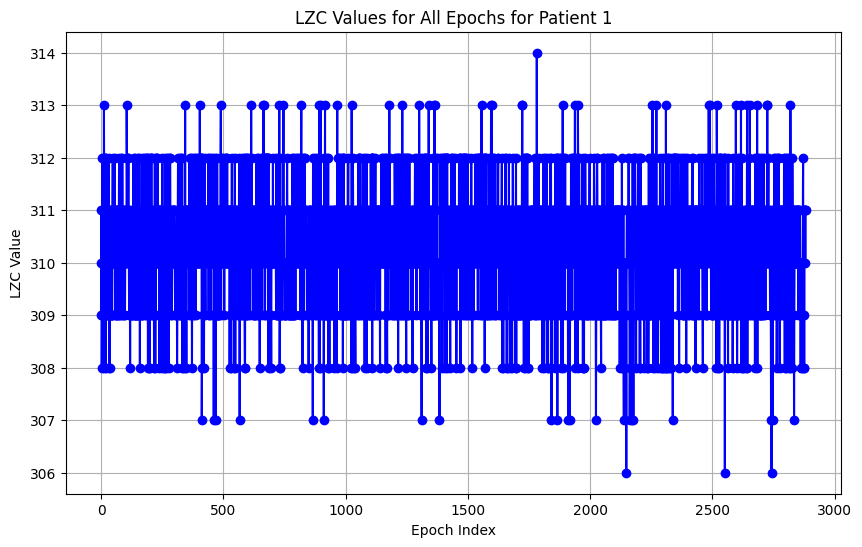

Not setting metadata
2880 matching events found
No baseline correction applied
0 projection items activated
Effective window size : 2.000 (s)


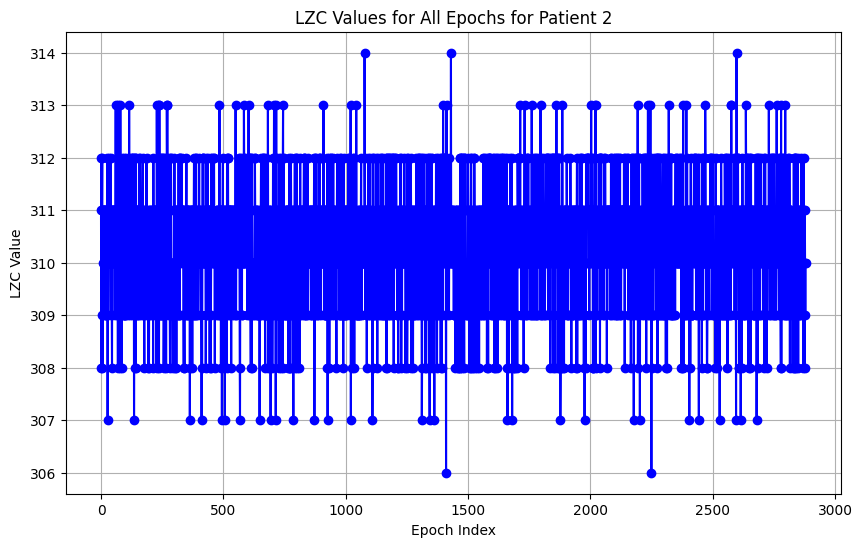

Power Ratios for Patient 1: {'delta': array([[0.01515258, 0.01955258, 0.01484658, 0.01374584, 0.01012545],
       [0.01483856, 0.01960152, 0.01907542, 0.01297215, 0.01372498],
       [0.01379369, 0.01786956, 0.01961191, 0.01559146, 0.01519754],
       ...,
       [0.01711182, 0.01505801, 0.01462527, 0.01605276, 0.01348716],
       [0.02290099, 0.01655855, 0.01436003, 0.01576355, 0.014971  ],
       [0.01232315, 0.02402737, 0.01389094, 0.01263364, 0.02063308]]), 'theta': array([[0.01863866, 0.01509806, 0.01168469, 0.02336065, 0.01164629],
       [0.0164904 , 0.01090412, 0.01284424, 0.01924893, 0.02518136],
       [0.01453648, 0.01469648, 0.02134224, 0.01822796, 0.01945376],
       ...,
       [0.01968437, 0.01341327, 0.01993762, 0.01680711, 0.01875294],
       [0.01878318, 0.0142999 , 0.01798607, 0.02042878, 0.01861417],
       [0.01524896, 0.01879383, 0.01481154, 0.01959939, 0.02290481]]), 'alpha': array([[0.01893099, 0.01882201, 0.01565888, 0.02199534, 0.01532026],
       [0.02072859,

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import mne

def calculate_power_ratios(epochs):
    """Calculate power spectral ratios for each epoch."""
    # Define frequency bands
    bands = {
        'delta': (0.5, 4),
        'theta': (4, 8),
        'alpha': (8, 12),
        'beta': (12, 30),
        'gamma': (30, 45)
    }

    # Compute PSD for all epochs at once
    spectrum = epochs.compute_psd(method='welch', n_fft=512, n_overlap=256)  # Use smaller n_fft (512) and n_overlap (256)

    # Get the PSD data and frequency bins
    psds = spectrum.get_data()  # Shape: (n_epochs, n_channels, n_freqs)
    freqs = spectrum.freqs

    # Calculate power ratios for each band
    power_ratios = {}
    for band_name, (low_freq, high_freq) in bands.items():
        band_mask = (freqs >= low_freq) & (freqs <= high_freq)
        band_power = np.trapz(psds[:, :, band_mask], axis=2)  # Integrate across frequencies
        power_ratios[band_name] = band_power

    # Normalize power ratios to get relative power
    total_power = np.sum([np.sum(band_power, axis=1) for band_power in power_ratios.values()], axis=0)
    normalized_ratios = {band: band_power / total_power[:, None] for band, band_power in power_ratios.items()}

    return normalized_ratios

def binarize_signal(signal, threshold=None):
    """Binarize a signal based on its mean or a specified threshold."""
    if threshold is None:
        threshold = np.mean(signal)
    return (signal > threshold).astype(int)

def lempel_ziv_complexity(binary_signal):
    """Calculate the Lempel-Ziv complexity of a binary signal."""
    n = len(binary_signal)
    i, lz_complexity = 0, 1
    substrings = set()
    current_substring = ""

    while i < n:
        current_substring += str(binary_signal[i])
        if current_substring not in substrings:
            substrings.add(current_substring)
            current_substring = ""
            lz_complexity += 1
        i += 1

    return lz_complexity

def analyze_subject_data(epochs):
    """Analyze EEG data for power ratios and Lempel-Ziv complexity."""
    # Calculate power spectral ratios
    power_ratios = calculate_power_ratios(epochs)

    # Get all epoch data (shape: n_epochs x n_channels x n_times)
    all_epoch_data = epochs.get_data()

    # Calculate Lempel-Ziv complexity for each epoch
    lz_complexities = []
    for epoch_data in all_epoch_data:
        # Use the first channel (or modify as needed, e.g., average across channels)
        signal = epoch_data[0]
        binary_signal = binarize_signal(signal)
        lz_complexity_value = lempel_ziv_complexity(binary_signal)
        lz_complexities.append(lz_complexity_value)

    return power_ratios, lz_complexities

def plot_lzc_values(lz_complexities, patient_id, title="Lempel-Ziv Complexity (LZC)"):
    """Plot Lempel-Ziv Complexity (LZC) values."""
    plt.figure(figsize=(10, 6))
    plt.plot(lz_complexities, marker='o', linestyle='-', color='b')
    plt.title(f"{title} for Patient {patient_id}")
    plt.xlabel("Epoch Index")
    plt.ylabel("LZC Value")
    plt.grid()
    plt.show()

# Simulate data for 2 VS patients
sfreq = 256  # Sampling frequency in Hz
n_channels = 5  # Adjust number of channels based on your data
rng = np.random.RandomState(42)

n_patients = 2

# Specify the number of epochs for each patient
epochs_per_patient = {
    1: 2882,  # VS Patient 1
    2: 2880   # VS Patient 2
}

n_times = int(sfreq * 8)  # 8 seconds of data per epoch

# Create channel names based on the number of channels
ch_names = [f'EEG{i+1}' for i in range(n_channels)]
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=['eeg'] * n_channels)

# Store results for both VS patients
all_power_ratios = {}
all_lz_complexities = {}

# Analyze data for both VS patients
for patient_id in range(1, n_patients + 1):
    n_epochs = epochs_per_patient[patient_id]  # Get the number of epochs for the current patient

    # Simulate data for each patient (replace with actual data loading if available)
    data_patient = rng.randn(n_epochs, n_channels, n_times)

    # Create EpochsArray object for each patient
    epochs = mne.EpochsArray(data_patient, info)

    # Analyze data for the current patient
    power_ratios, lz_complexities = analyze_subject_data(epochs)

    # Store results
    all_power_ratios[patient_id] = power_ratios
    all_lz_complexities[patient_id] = lz_complexities

    # Plot LZC values for the current patient
    plot_lzc_values(lz_complexities, patient_id, title="LZC Values for All Epochs")

# Optional: Display or save the power ratios and LZC values for each patient
# For example, print the power ratios for the first patient:
print("Power Ratios for Patient 1:", all_power_ratios[1])


In [16]:
import numpy as np

# Compute mean ± std for each subject
lzc_stats = {}
for subject_id, lz_complexities in all_lz_complexities.items():
    mean_lzc = np.mean(lz_complexities)
    std_lzc = np.std(lz_complexities)
    lzc_stats[subject_id] = (mean_lzc, std_lzc)
    print(f"Subject {subject_id}: Mean LZC = {mean_lzc:.4f} ± {std_lzc:.4f}")

Subject 1: Mean LZC = 310.2557 ± 1.1441
Subject 2: Mean LZC = 310.2847 ± 1.1667
